**Phase 3:** Unsupervised Learning    
**DATASET :** Iris Species from kaggle    
https://www.kaggle.com/datasets/uciml/iris    
**Concepts:**
•    Clustering: k-Means & Hierarchical
•    Dimensionality reduction recap (PCA/t-SNE)

**Mounnting Drive:**    
We have mounted the Google Drive here.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries:**    
We have imported some imported Libaries we are going to use.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

**Loading Dataset:**    
We have loaded the dataset from google drive. and we have printed the first few rows of the dataset.

In [21]:
df=pd.read_csv('/content/drive/MyDrive/ACM-TASKS/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Data Preprocessing – Standardization:**    

Dropped the unnecessary "Id" column and separated features (X) from the target (Species), then applied StandardScaler to normalize the feature values for better model performance.

In [22]:
from sklearn.preprocessing import StandardScaler
df.drop(columns=["Id"], inplace=True)
X = df.drop("Species", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Elbow Method for Optimal Clusters:**   

Used the Elbow Method by plotting inertia (within-cluster sum of squares) for k = 1 to 10 to visually identify the optimal number of clusters for KMeans clustering.

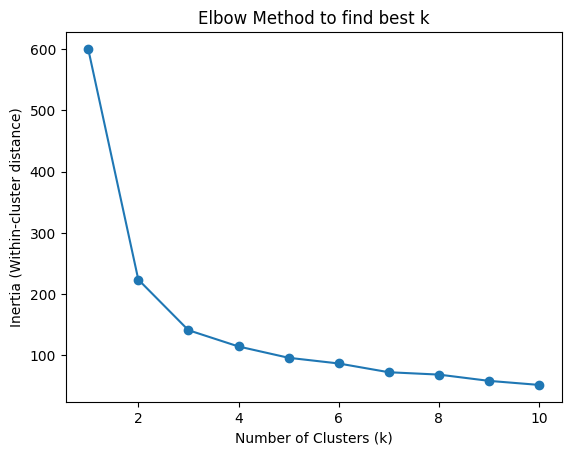

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster distance)")
plt.title("Elbow Method to find best k")
plt.show()

** Applying KMeans Clustering:**   

Fitted KMeans with k=3 clusters on the scaled features, predicted cluster labels, and added them to the DataFrame as a new column KMeans_Cluster.

In [25]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
df["KMeans_Cluster"] = kmeans_labels
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   KMeans_Cluster  
0               1  
1               1  
2               1  
3               1  
4               1  


**PCA Visualization of Clusters:**

Reduced the scaled feature space to 2 principal components using PCA and visualized the KMeans clusters in 2D using a scatter plot with color-coded cluster labels.

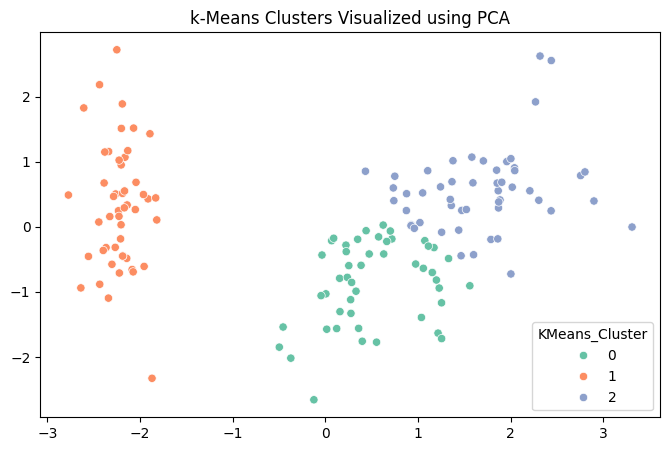

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["KMeans_Cluster"], palette="Set2")
plt.title("k-Means Clusters Visualized using PCA")
plt.show()

**Hierarchical Clustering – Dendrogram:**  

Computed hierarchical clusters using Ward’s method and plotted a dendrogram to visualize how data points are merged at each step, helping determine the optimal number of clusters.

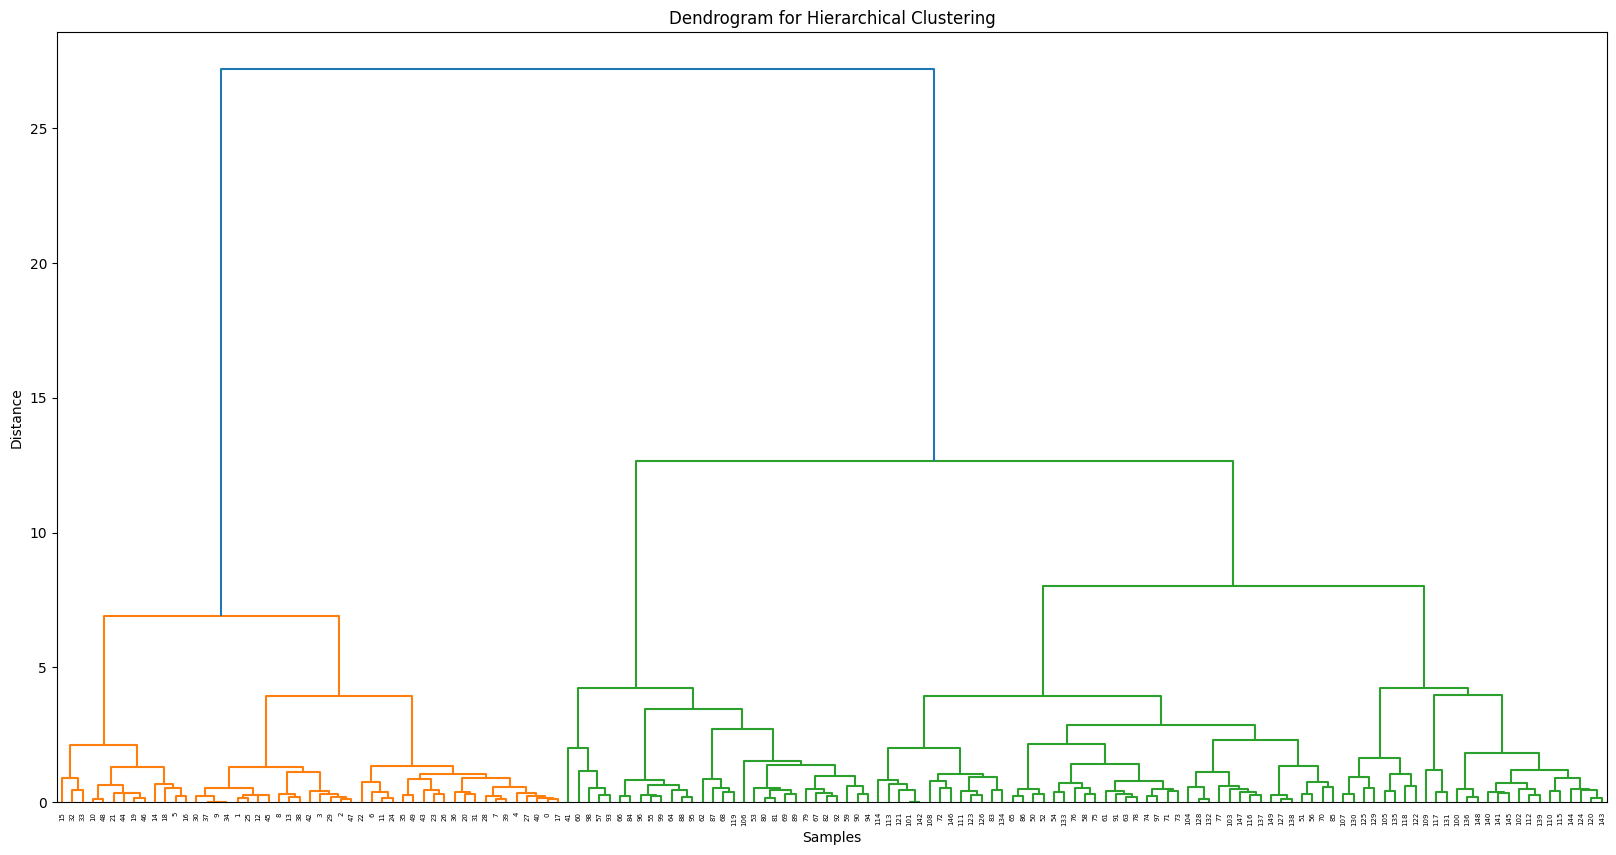

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
linkage_matrix = linkage(X_scaled, method='ward')
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [32]:
hier_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')
df["Hierarchical_Cluster"] = hier_labels
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   KMeans_Cluster  Hierarchical_Cluster  
0               1                     1  
1               1                     1  
2               1                     1  
3               1                     1  
4               1                     1  


**Assigning Hierarchical Cluster Labels:**

Cut the dendrogram at 3 clusters using fcluster and added the resulting cluster labels to the DataFrame as a new column Hierarchical_Cluster.

**Summary:**

Scaled features using StandardScaler

Applied k-Means clustering (k=3)

Visualized clusters using PCA

Performed Hierarchical Clustering with dendrogram

Added cluster labels to DataFrame